In [1]:
##                  IMPORT ISLEMLERİ
import re
import numpy as np 
import pandas as pd # DATA SETİNİ OKUMA VE DÜZENLEME

df1 = pd.read_csv('data/tweetset.csv', encoding="windows-1254")
df2 = pd.read_csv('data/TurkishTweets.csv')
df1 = df1.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis = 1)


df2 = df2.dropna()
df2["Etiket"].replace({"kızgın": "Negative", "korku": "Negative", "mutlu": "Positive", 
                        "surpriz": "Positive", "üzgün": "Negative"}, inplace=True)
df2.columns = ['Tweets', 'Sentiment']
df1["Tip"].replace({"Pozitif": "Positive", " Negatif": "Negative", "Negatif": "Negative" }, inplace=True)
df1 = df1.reindex(columns=['Paylaşım','Tip'])
df1.columns = ['Tweets', 'Sentiment']
df= pd.concat([df1,pd.DataFrame.from_records(df2)])


df['Tweets'] = [token.lower() for token in df['Tweets']]
df['Tweets'] = df['Tweets'].replace('@[A-Za-z0-9]+', '', regex=True).replace('@[A-Za-z0-9]+', '', regex=True)
df['Tweets'] = df['Tweets'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)


sentences = df['Tweets'].copy()

new_sent = []

In [1]:
import re
import numpy as np 
import pandas as pd # DATA SETİNİ OKUMA VE DÜZENLEME
import json
from urllib import response
from flask import Flask,jsonify,request
# RNN MODELİNİ KURMAK İÇİN KERAS KUTUPHANESİNİ KULLANACAĞIZ
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df1 = pd.read_csv('data/tweetset.csv', encoding="windows-1254")
df2 = pd.read_csv('data/TurkishTweets.csv')
df1 = df1.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis = 1)


df2 = df2.dropna()
df2["Etiket"].replace({"kızgın": "Negative", "korku": "Negative", "mutlu": "Positive", 
                        "surpriz": "Positive", "üzgün": "Negative"}, inplace=True)
df2.columns = ['Tweets', 'Sentiment']
df1["Tip"].replace({"Pozitif": "Positive", " Negatif": "Negative", "Negatif": "Negative" }, inplace=True)
df1 = df1.reindex(columns=['Paylaşım','Tip'])
df1.columns = ['Tweets', 'Sentiment']
df= pd.concat([df1,pd.DataFrame.from_records(df2)])


df['Tweets'] = [token.lower() for token in df['Tweets']]
df['Tweets'] = df['Tweets'].replace('@[A-Za-z0-9]+', '', regex=True).replace('@[A-Za-z0-9]+', '', regex=True)
df['Tweets'] = df['Tweets'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)


sentences = df['Tweets'].copy()

new_sent = []
i = 0
for sentence in sentences:
    new_sentence = re.sub('[0-9]+', '', sentence)
    new_sent.append(new_sentence)
    i += 1
    
df['Tweets'] = new_sent

import string

table = str.maketrans('', '', string.punctuation)
sentences = df['Tweets'].copy()
new_sent = []
for sentence in sentences:
    words = sentence.split()
    stripped = [w.translate(table) for w in words]
    new_sent.append(stripped)

df['Tweets'] = new_sent

7399 7711


ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

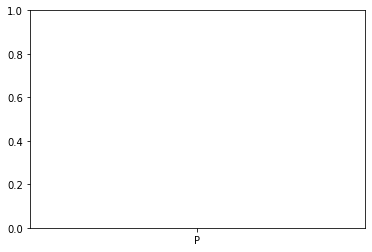

In [34]:
from matplotlib import pyplot as plot
sentences = df['Sentiment'].copy()
new_sent = []
i=0
j=0
for sentence in sentences:
    j+=1
    if(str(sentence)=="Positive"):
        i+=1
    
pozitifsayisi=i
negatifsayisi=j-i

print(negatifsayisi,pozitifsayisi)

plot.bar(2,pozitifsayisi,label="Pozitif Etiketli Veri sayısı")
plot.bar(2,negatifsayisi,label="Negatif Etiketli Veri sayısı")

plot.legend()
plot.title("Verilerin grafiği")
plot.xlabel("Veri türü")
plot.ylabel("Veri sayısı")

plot.show


In [2]:
list(df['Tweets'])

[['doğa', 'ağzımıza', 'sıçsa', 'hakkı', 'var'],
 ['anne', 'bir', 'sanatçıdır', 'en', 'güzel', 'eseri', 'de', 'yavrusudur'],
 ['ibrahimin', 'oğlunu', 'koruyan', 'tanrı’ya', 'da', 'ben', 'sokayım'],
 ['köpeğim', 'suratına', 'sıçsın', 'senin', 'namussuz', 'karı'],
 ['ben', 'söğüşledim', 'birazda', 'sen', 'söğüşle'],
 ['şerefsizlik', 'sözde', 'sanatçıların', 'vazgeçemediği', 'bir', 'değerdir'],
 ['kendisi', 'de', 'bilmiyordur', 'çünkü', 'beyinsiz'],
 ['aşırı',
  'bıyıklı',
  'geleneksel',
  'keko',
  'adam',
  'bi',
  'ayrılıp',
  'bi',
  'barışan',
  'boş',
  'bakışlı',
  'salak',
  'çift',
  'veya',
  'direnaj',
  'ertuğrul',
  '',
  'sezon',
  'dışında',
  'bi',
  'şey',
  'izlemek',
  'isteyenler',
  'için',
  'bi',
  'çözüm',
  'düşündünüz',
  'mü',
  'peki'],
 ['en',
  'uzun',
  'yolculuklar',
  'bile',
  'tek',
  'bir',
  'adımla',
  'başlar',
  'geleceğin',
  'mimarları',
  'gençlerimiz',
  'için',
  'atılan',
  'ilk',
  'adımları',
  'var',
  'gücümüzle',
  'desteklemeye',
  'deva

In [12]:

for sentence in sentences:
    new_sentence = re.sub("doğa.*", ' ', sentence)
    new_sent.append(new_sentence)
    
    
list(new_sent)

['doğa ağzımıza sıçsa hakkı var',
 'doğa ağzımıza sıçsa hakkı var',
 'anne bir sanatçıdır, en güzel eseri de yavrusudur ',
 'ibrahimin oğlunu koruyan tanrı’ya da ben sokayım',
 'köpeğim suratına sıçsın senin namussuz karı',
 'ben söğüşledim, birazda sen söğüşle',
 'şerefsizlik, sözde sanatçıların vazgeçemediği bir değerdir',
 'kendisi de bilmiyordur çünkü beyinsiz',
 'aşırı bıyıklı geleneksel keko adam, bi ayrılıp bi barışan boş bakışlı salak çift veya direnaj ertuğrul  sezon dışında bi şey izlemek isteyenler için bi çözüm düşündünüz mü peki',
 'en uzun yolculuklar bile, tek bir adımla başlar geleceğin mimarları gençlerimiz için atılan ilk adımları var gücümüzle desteklemeye devam ediyoruz',
 'vallahi bu aralar istediğimiz tek şey huzur',
 'chp genel başkanı kemal kılıçdaroğlunun eşi selvi kılıçdaroğlu, hazine ve maliye bakanı berat albayrakın eşi esra albayrakı telefonla arayarak, yeni doğan çocuğu ile ilgili sosyal medyadan yapılan hakaret içerikli paylaşımlar nedeniyle duyduğu üzünt